[-74.07677495   1.30630548   2.06278182]


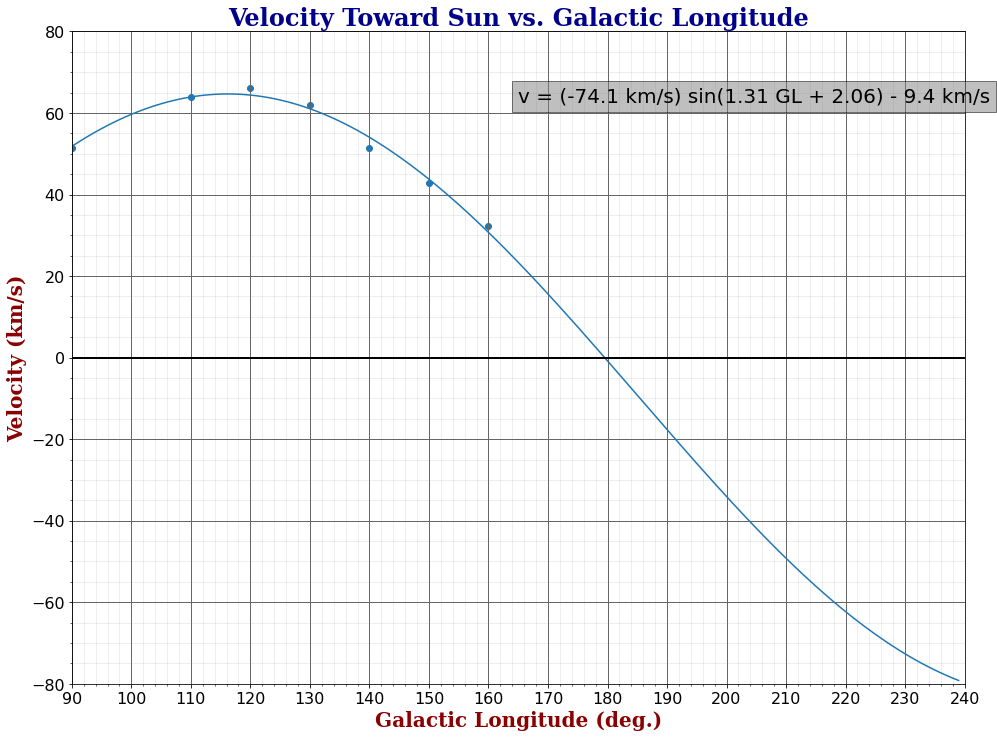

In [1]:
import numpy as np
from scipy import optimize
from lmfit import Model
import matplotlib.pyplot as plt
from numpy import exp, loadtxt, pi, sqrt

data_filename = "QuadII&III_sineFit_big"
data_set = np.loadtxt(data_filename+".csv", delimiter=',')

galactic_long_deg = np.zeros(data_set.shape[0])
galactic_long_rad = np.zeros(data_set.shape[0])
velocity = np.zeros(data_set.shape[0])
x_model = np.zeros(150)
y_model = np.zeros(150)

# data_set is a 2-D array.
# The galactic_long[i] values are assigned the data_set(i,0) values; 
# velocity[i] values are assigned the data_set(i,1) values

i = 0
while (i < data_set.size/2):
    galactic_long_deg[i] = data_set[i][0]
    galactic_long_rad[i] = galactic_long_deg[i]*np.pi/180
    velocity[i] = data_set[i][1]
    i +=1

# Sine Fit to data

x_data = galactic_long_rad
y_data = velocity

def test_func(x, a, b, c):
    return a * np.sin(b * x + c) + -9.4

params, params_covariance = optimize.curve_fit(test_func, x_data, y_data,
                                               p0=[30, 2, 0])

print(params)

#add 2nd graph displaying fit function.

font1 = {'family': 'serif',
        'color':  'darkred',
        'weight': 'bold',
        'size': 20,
        }

font2 = {'family': 'serif',
        'color':  'darkblue',
        'weight': 'bold',
        'size': 24,
        }
fig, ax = plt.subplots(1, figsize=(16, 12))
plt.title("Velocity Toward Sun vs. Galactic Longitude", fontdict=font2)
#plt.suptitle(data_filename, fontdict=font1)

plt.scatter(galactic_long_deg, velocity)
plt.xlabel("Galactic Longitude (deg.)", fontdict=font1)
plt.ylabel("Velocity (km/s)", fontdict=font1)
plt.xlim([90,240])
plt.ylim([-80,80])

for i in np.arange(90, 240, 1):
    x_model[i-90] = i*np.pi/180
    y_model[i-90] = test_func(x_model[i-90], params[0], params[1], params[2])
    
plt.plot(x_model*180/np.pi, y_model, label='Fitted function')

plt.axhline(linewidth=2, color='black')

#Set tick marks
ax.xaxis.set_major_locator(plt.MultipleLocator(10))
ax.xaxis.set_minor_locator(plt.MultipleLocator(5))
fig

plt.xticks(fontsize= 16)
plt.yticks(fontsize= 16) 

# Add grid lines
plt.grid(b=True, which='major', color='#666666', linestyle='-', linewidth=1)

# Show the minor grid lines with very faint and almost transparent grey lines
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)

# Add curve fit info
props = dict(boxstyle='square', facecolor='gray', alpha=0.5)
fit_info = "v = ({:.3} km/s) sin({:.3} GL + {:.3}) - 9.4 km/s".format(params[0], params[1], params[2])
ax.text(0.5, 0.9, fit_info, transform=ax.transAxes, fontsize=20, verticalalignment='center', bbox=props)

plt.savefig('GalacticPlane_SineFit_big.png')
plt.show()

# Output modified spectrum to a new file
